In [616]:
#import libraries
import pandas as pd
import glob
import os
from dotenv import dotenv_values
import pyodbc
import warnings
#visualisation
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import re


warnings.filterwarnings("ignore")

In [499]:
#loading environmental variables from .env
environmental_variables = dotenv_values(r"C:\Users\hp\Desktop\capstone\A-power-bi-project\.env")

server = environmental_variables.get("SERVER")
username = environmental_variables.get("USERNAME")
password = environmental_variables.get("PASSWORD")
database = environmental_variables.get("DATABASE")

#create connection string
connection_string = f"DRIVER={{SQL Server}}; DATABASE={database}; SERVER={server}; UID={username}; PWD={password}"

In [500]:
connection = pyodbc.connect(connection_string)

In [501]:
db_query = ''' SELECT * 
               FROM INFORMATION_SCHEMA.TABLES
               WHERE TABLE_TYPE = 'BASE TABLE' '''

In [502]:
#calling selected table from database
ata = pd.read_sql(db_query, connection)
ata

,TABLE_CATALOG,TABLE_SCHEMA,TABLE_NAME,TABLE_TYPE
0,dapDB,dbo,Sales_July_2019,BASE TABLE
1,dapDB,dbo,Sales_August_2019,BASE TABLE
2,dapDB,dbo,Sales_September_2019,BASE TABLE
3,dapDB,dbo,Sales_October_2019,BASE TABLE
4,dapDB,dbo,Sales_November_2019,BASE TABLE
5,dapDB,dbo,Sales_December_2019,BASE TABLE


In [503]:
query_01 = "SELECT * FROM dbo.Sales_July_2019"
july_data = pd.read_sql(query_01,connection)
july_data.to_csv('Sales_July_2019.csv', index = False)

In [504]:
query_02 = "SELECT * FROM dbo.Sales_August_2019"
august_data = pd.read_sql(query_02,connection)
august_data.to_csv('Sales_August_2019.csv', index = False)

In [505]:
query_03 = "SELECT * FROM dbo.Sales_September_2019"
september_data = pd.read_sql(query_03,connection)
september_data.to_csv('Sales_September_2019.csv', index = False)

In [506]:
query_04 = "SELECT * FROM dbo.Sales_October_2019"
october_data = pd.read_sql(query_04,connection)
october_data.to_csv('Sales_October_2019.csv', index = False)

In [507]:
query_05 = "SELECT * FROM dbo.Sales_November_2019"
november_data = pd.read_sql(query_05,connection)
november_data.to_csv('Sales_November_2019.csv', index = False)

In [508]:
query_06 = "SELECT * FROM dbo.Sales_December_2019"
december_data = pd.read_sql(query_06,connection)
december_data.to_csv('Sales_December_2019.csv', index = False)

In [509]:
# # Define the folder where the CSV files are located
# data_folder_path = r"C:\Users\hp\Desktop\capstone\A-power-bi-project\Data"

# # List all CSV files for each month (assuming file names follow the pattern 'Sales_January_2019.csv', 'Sales_February_2019.csv', etc.)
# csv_files = [
#     "Sales_January_2019.csv", "Sales_February_2019.csv", "Sales_March_2019.csv",
#     "Sales_April_2019.csv", "Sales_May_2019.csv", "Sales_June_2019.csv",
#     "Sales_July_2019.csv", "Sales_August_2019.csv", "Sales_September_2019.csv",
#     "Sales_October_2019.csv", "Sales_November_2019.csv", "Sales_December_2019.csv"
# ]

# # List to store individual DataFrames
# dataframes = []

# # Load each CSV and append to the dataframes list
# for file_name in csv_files:
#     file_path = os.path.join(data_folder_path, file_name)
#     df = pd.read_csv(file_path)
#     dataframes.append(df)

# # Concatenate all the individual DataFrames into one
# combined_df = pd.concat(dataframes, ignore_index=True)

# # Now combined_df contains the data from all months
# print(combined_df)


In [510]:
july_data.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,222910.0,Apple Airpods Headphones,1.0,150.00,2026-07-19 16:51:00.0000000,"389 South St, Atlanta, GA 30301"
1,222911.0,Flatscreen TV,1.0,300.00,2005-07-19 08:55:00.0000000,"590 4th St, Seattle, WA 98101"
2,222912.0,AA Batteries (4-pack),1.0,3.84,2029-07-19 12:41:00.0000000,"861 Hill St, Atlanta, GA 30301"
3,222913.0,AA Batteries (4-pack),1.0,3.84,2028-07-19 10:15:00.0000000,"190 Ridge St, Atlanta, GA 30301"
4,222914.0,AAA Batteries (4-pack),5.0,2.99,2031-07-19 02:13:00.0000000,"824 Forest St, Seattle, WA 98101"


In [511]:
#manually reading the data from january to june
january_data = pd.read_csv(r"C:\Users\hp\Desktop\capstone\A-power-bi-project\Data\Sales_January_2019.csv")
february_data = pd.read_csv(r"C:\Users\hp\Desktop\capstone\A-power-bi-project\Data\Sales_February_2019.csv")
march_data = pd.read_csv(r"C:\Users\hp\Desktop\capstone\A-power-bi-project\Data\Sales_March_2019.csv")
april_data = pd.read_csv(r"C:\Users\hp\Desktop\capstone\A-power-bi-project\Data\Sales_April_2019.csv")
may_data = pd.read_csv(r"C:\Users\hp\Desktop\capstone\A-power-bi-project\Data\Sales_May_2019.csv")
june_data = pd.read_csv(r"C:\Users\hp\Desktop\capstone\A-power-bi-project\Data\Sales_June_2019.csv")

In [512]:
january_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [513]:
first_half_sales_data = pd.concat([january_data, february_data, march_data, april_data, may_data, june_data])
first_half_sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [514]:
second_half_sales_data = pd.concat([july_data, august_data, september_data, october_data, november_data, december_data])
second_half_sales_data.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,222910.0,Apple Airpods Headphones,1.0,150.00,2026-07-19 16:51:00.0000000,"389 South St, Atlanta, GA 30301"
1,222911.0,Flatscreen TV,1.0,300.00,2005-07-19 08:55:00.0000000,"590 4th St, Seattle, WA 98101"
2,222912.0,AA Batteries (4-pack),1.0,3.84,2029-07-19 12:41:00.0000000,"861 Hill St, Atlanta, GA 30301"
3,222913.0,AA Batteries (4-pack),1.0,3.84,2028-07-19 10:15:00.0000000,"190 Ridge St, Atlanta, GA 30301"
4,222914.0,AAA Batteries (4-pack),5.0,2.99,2031-07-19 02:13:00.0000000,"824 Forest St, Seattle, WA 98101"


In [515]:
first_half_sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85625 entries, 0 to 13621
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          85380 non-null  object
 1   Product           85380 non-null  object
 2   Quantity Ordered  85380 non-null  object
 3   Price Each        85380 non-null  object
 4   Order Date        85380 non-null  object
 5   Purchase Address  85380 non-null  object
dtypes: object(6)
memory usage: 4.6+ MB


In [516]:
second_half_sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101225 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order_ID          100730 non-null  float64
 1   Product           100925 non-null  object 
 2   Quantity_Ordered  100730 non-null  float64
 3   Price_Each        100730 non-null  float64
 4   Order_Date        100730 non-null  object 
 5   Purchase_Address  100925 non-null  object 
dtypes: float64(3), object(3)
memory usage: 5.4+ MB


In [517]:
first_half_sales_data = first_half_sales_data.rename(columns={'Order ID' : 'Order_ID', 'Quantity Ordered' : 'Quantity_Ordered',
                                                              'Price Each':'Price_Each','Order Date': 'Order_Date', 'Purchase Address':'Purchase_Address'})

In [518]:
combined_df = pd.concat([first_half_sales_data, second_half_sales_data])
combined_df.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [519]:
combined_df.tail()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
25112,319666.0,Lightning Charging Cable,1.0,14.95,2011-12-19 20:58:00.0000000,"14 Madison St, San Francisco, CA 94016"
25113,319667.0,AA Batteries (4-pack),2.0,3.84,2001-12-19 12:01:00.0000000,"549 Willow St, Los Angeles, CA 90001"
25114,319668.0,Vareebadd Phone,1.0,400.0,2009-12-19 06:43:00.0000000,"273 Wilson St, Seattle, WA 98101"
25115,319669.0,Wired Headphones,1.0,11.99,2003-12-19 10:39:00.0000000,"778 River St, Dallas, TX 75001"
25116,319670.0,Bose SoundSport Headphones,1.0,99.989998,2021-12-19 21:45:00.0000000,"747 Chestnut St, Los Angeles, CA 90001"


In [520]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186850 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order_ID          186110 non-null  object
 1   Product           186305 non-null  object
 2   Quantity_Ordered  186110 non-null  object
 3   Price_Each        186110 non-null  object
 4   Order_Date        186110 non-null  object
 5   Purchase_Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [521]:
#taking care of null values
combined_df.dropna(thresh=int(0.8*len(combined_df.columns)), inplace=True)  # Keep rows with at least 80% non-null values


In [522]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186110 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order_ID          186110 non-null  object
 1   Product           186110 non-null  object
 2   Quantity_Ordered  186110 non-null  object
 3   Price_Each        186110 non-null  object
 4   Order_Date        186110 non-null  object
 5   Purchase_Address  186110 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [523]:
combined_df.tail()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
25112,319666.0,Lightning Charging Cable,1.0,14.95,2011-12-19 20:58:00.0000000,"14 Madison St, San Francisco, CA 94016"
25113,319667.0,AA Batteries (4-pack),2.0,3.84,2001-12-19 12:01:00.0000000,"549 Willow St, Los Angeles, CA 90001"
25114,319668.0,Vareebadd Phone,1.0,400.0,2009-12-19 06:43:00.0000000,"273 Wilson St, Seattle, WA 98101"
25115,319669.0,Wired Headphones,1.0,11.99,2003-12-19 10:39:00.0000000,"778 River St, Dallas, TX 75001"
25116,319670.0,Bose SoundSport Headphones,1.0,99.989998,2021-12-19 21:45:00.0000000,"747 Chestnut St, Los Angeles, CA 90001"


In [558]:
combined_df['Quantity_Ordered'] = pd.to_numeric(combined_df['Quantity_Ordered'], errors='coerce')
combined_df['Price_Each'] = pd.to_numeric(combined_df['Price_Each'], errors='coerce')
combined_df['Order_Date'] = pd.to_datetime(combined_df['Order_Date'], errors = 'coerce')
#check for rows with invalid dates
invalid_dates = combined_df['Order_Date'].isna().sum()
print(f"number of rows with invalid dates:\n{invalid_dates}")
#drop rows with invalid dates
combined_df = combined_df.dropna(subset = ['Order_Date'])
#format the order date column
combined_df['Order_Date'] = combined_df['Order_Date'].dt.strftime('%Y-%m-%d %H:%M:%S')


number of rows with invalid dates:
0


In [559]:
combined_df['Order_Date'] = pd.to_datetime(combined_df['Order_Date'], errors = 'coerce')

In [555]:
# Extract unique years
unique_years = combined_df['Order_Date'].dt.year.unique()

print("Unique years in the DataFrame:", unique_years)

Unique years in the DataFrame: [2019 2026 2005 2029 2028 2031 2003 2021 2017 2014 2030 2002 2020 2013
 2009 2015 2004 2018 2024 2023 2007 2016 2010 2008 2006 2001 2011 2025
 2027 2012 2022]


In [556]:
# Extract year and count occurrences
year_counts = combined_df['Order_Date'].dt.year.value_counts().sort_index()

print("Count of records per year:")
print(year_counts)

Count of records per year:
Order_Date
2001     3269
2002     3344
2003     3125
2004     3261
2005     3218
2006     3301
2007     3258
2008     3272
2009     3219
2010     3345
2011     3208
2012     3235
2013     3367
2014     3275
2015     3327
2016     3259
2017     3299
2018     3292
2019    88592
2020     3266
2021     3244
2022     3334
2023     3291
2024     3290
2025     3304
2026     3338
2027     3305
2028     3278
2029     3278
2030     3220
2031     2336
Name: count, dtype: int64


In [560]:
# Confirm duplicated rows in the dataset
duplicates = combined_df[combined_df.duplicated()]
duplicates

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,City,State,Revenue
875,142071,AA Batteries (4-pack),1.0,3.84000,2019-01-17 23:02:00,"131 2nd St, Boston, MA 02215",Boston,Massachusetts,3.84000
4126,145143,Lightning Charging Cable,1.0,14.95000,2019-01-06 03:01:00,"182 Jefferson St, San Francisco, CA 94016",San Francisco,California,14.95000
5811,146765,Google Phone,1.0,600.00000,2019-01-21 11:23:00,"918 Highland St, New York City, NY 10001",New York City,New York,600.00000
6807,147707,Wired Headphones,1.0,11.99000,2019-01-04 16:50:00,"883 4th St, Dallas, TX 75001",Dallas,Texas,11.99000
8134,148984,USB-C Charging Cable,1.0,11.95000,2019-01-08 17:36:00,"562 14th St, Boston, MA 02215",Boston,Massachusetts,11.95000
...,...,...,...,...,...,...,...,...,...
19894,314675.0,AA Batteries (4-pack),1.0,3.84000,2026-12-19 09:01:00,"927 13th St, San Francisco, CA 94016",San Francisco,California,3.84000
20452,315204.0,Wired Headphones,1.0,11.99000,2012-12-19 12:41:00,"680 6th St, San Francisco, CA 94016",San Francisco,California,11.99000
21240,315955.0,ThinkPad Laptop,1.0,999.98999,2026-12-19 17:28:00,"588 Chestnut St, Seattle, WA 98101",Seattle,Washington,999.98999
21467,316173.0,AAA Batteries (4-pack),1.0,2.99000,2022-12-19 22:44:00,"907 Sunset St, Portland, OR 97035",Portland,Oregon,2.99000


In [561]:
# Drop duplicates
combined_df.drop_duplicates(keep='first', inplace=True)

# Confirm drop
f'There are {combined_df.duplicated().sum()} duplicated rows in the dataset now.'

'There are 0 duplicated rows in the dataset now.'

In [562]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185686 entries, 0 to 25116
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order_ID          185686 non-null  object        
 1   Product           185686 non-null  object        
 2   Quantity_Ordered  185686 non-null  float64       
 3   Price_Each        185686 non-null  float64       
 4   Order_Date        185686 non-null  datetime64[ns]
 5   Purchase_Address  185686 non-null  object        
 6   City              185686 non-null  object        
 7   State             185686 non-null  object        
 8   Revenue           185686 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 14.2+ MB


**Filtering the dataset**



In [565]:
# Filter out 2019 data from the entire dataset provided
data_2019 = combined_df[combined_df['Order_Date'].dt.year == 2019]
data_2019.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,City,State,Revenue
0,141234,iPhone,1.0,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",Boston,Massachusetts,700.00
1,141235,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",Portland,Oregon,14.95
2,141236,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",San Francisco,California,23.98
3,141237,27in FHD Monitor,1.0,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",Los Angeles,California,149.99
4,141238,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",Austin,Texas,11.99


### **Exploratory Data Analysis**

### **Univariate analysis**

#### **Numerical data**

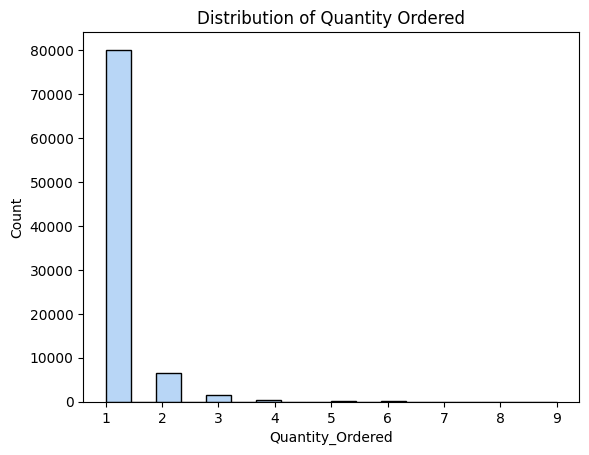

In [566]:
#The numerical columns are quantity_ordered and price each
#qauntity_ordered
#using seaborn's pastel color palette
sns.set_palette('pastel')
#plotting
sns.histplot(data_2019['Quantity_Ordered'])
plt.title('Distribution of Quantity Ordered')
plt.show()

**Key Insights**

The histogram above illustrates the distribution of the quantity of items ordered by customers. A significant observation from this analysis is that the majority of customers tend to order only one item per purchase. This trend suggests that either the products are typically bought individually or that the purchasing process may not incentivize bulk buying. Further investigation into customer behavior, product characteristics, and sales strategies could provide insights into optimizing the shopping experience and potentially increasing the average order quantity.

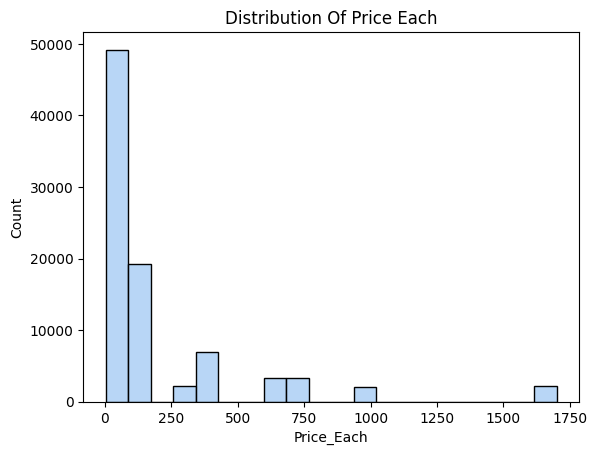

In [567]:
#price each
sns.histplot(data_2019['Price_Each'], bins = 20)
plt.title('Distribution Of Price Each')
plt.show()

**Insights**

The histogram for the Price_Each column shows that most products are sold at lower prices, with a high concentration of counts near zero. As prices increase, the number of purchases decreases, indicating that customers primarily buy lower-cost items, while fewer high-priced products are sold. This trend suggests that the bulk of sales comes from inexpensive products, which could guide pricing strategies or promotional efforts.

#### **Categorical columns**

In [568]:
data_2019.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,City,State,Revenue
0,141234,iPhone,1.0,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",Boston,Massachusetts,700.00
1,141235,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",Portland,Oregon,14.95
2,141236,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",San Francisco,California,23.98
3,141237,27in FHD Monitor,1.0,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",Los Angeles,California,149.99
4,141238,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",Austin,Texas,11.99


In [569]:
#table to show counts
product_counts = data_2019['Product'].value_counts().reset_index()
#rename columns
product_counts.columns = ['Product', 'Count']
#sort in descending order
sorted_product_counts = product_counts.sort_values(by='Count', ascending=False)
print(sorted_product_counts)

                       Product  Count
0         USB-C Charging Cable  10332
1     Lightning Charging Cable  10288
2        AA Batteries (4-pack)   9803
3       AAA Batteries (4-pack)   9786
4             Wired Headphones   9000
5     Apple Airpods Headphones   7395
6   Bose SoundSport Headphones   6323
7             27in FHD Monitor   3623
8                       iPhone   3328
9       34in Ultrawide Monitor   2989
10      27in 4K Gaming Monitor   2884
11                Google Phone   2691
12          Macbook Pro Laptop   2238
13               Flatscreen TV   2226
14             ThinkPad Laptop   1982
15                20in Monitor   1901
16             Vareebadd Phone   1019
17          LG Washing Machine    339
18                    LG Dryer    331


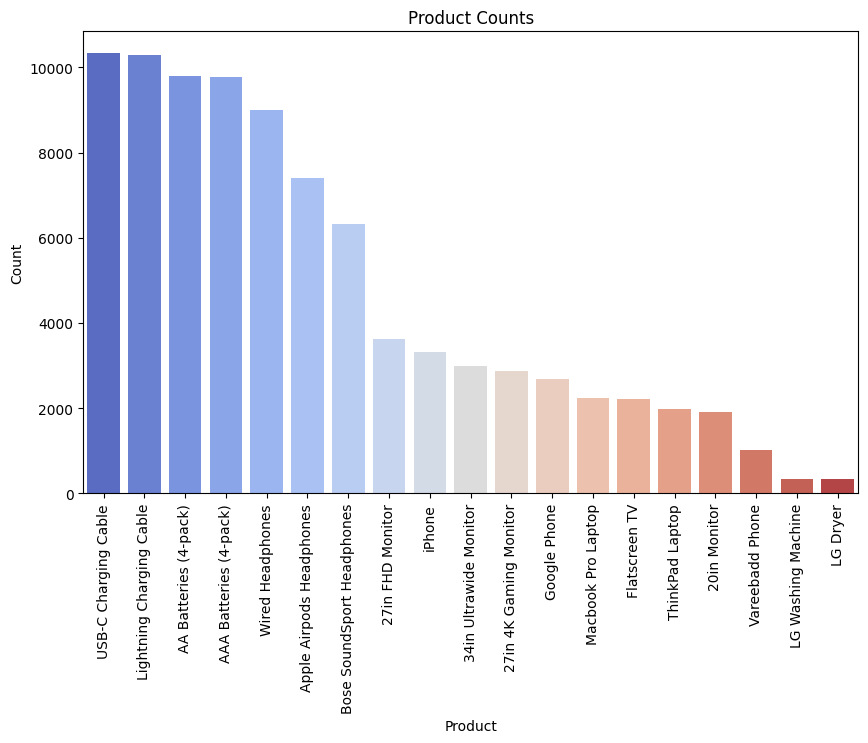

In [570]:
#bar chart in descending order
plt.figure(figsize=(10,6))
sns.barplot(x='Product', y = 'Count', data = sorted_product_counts, palette='coolwarm')
#labels
plt.xlabel('Product')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Product Counts')
plt.show()

**Insights**

The data reveals that USB-C Charging Cable and Lightning Charging Cable are the most frequently ordered items, highlighting their high demand. Batteries, including AAA Batteries (4-pack) and AA Batteries (4-pack), are also popular, suggesting a strong consumer preference for these essential items. Headphones, both wired and wireless, such as Wired Headphones, Apple Airpods Headphones, and Bose SoundSport Headphones, show significant order counts, indicating a notable interest in audio products. The dataset also reflects a broad range of categories from electronics to household items, with some less popular products like LG Washing Machine and LG Dryer having lower order counts. This information can inform inventory management and marketing strategies, emphasizing the need for focus on high-demand products while reevaluating the approach for items with lower sales.

In [571]:
data_2019.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,City,State,Revenue
0,141234,iPhone,1.0,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",Boston,Massachusetts,700.00
1,141235,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",Portland,Oregon,14.95
2,141236,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",San Francisco,California,23.98
3,141237,27in FHD Monitor,1.0,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",Los Angeles,California,149.99
4,141238,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",Austin,Texas,11.99


In [572]:
#some analysis based on the city
data_2019['City'] = data_2019['Purchase_Address'].apply(lambda x: x.split(',')[1].strip())
print(data_2019[['Purchase_Address','City']])

                            Purchase_Address           City
0            944 Walnut St, Boston, MA 02215         Boston
1           185 Maple St, Portland, OR 97035       Portland
2      538 Adams St, San Francisco, CA 94016  San Francisco
3         738 10th St, Los Angeles, CA 90001    Los Angeles
4              387 10th St, Austin, TX 73301         Austin
...                                      ...            ...
24899           50 Lake St, Boston, MA 02215         Boston
24907   245 Wilson St, Los Angeles, CA 90001    Los Angeles
25022      285 4th St, Los Angeles, CA 90001    Los Angeles
25064      908 2nd St, Los Angeles, CA 90001    Los Angeles
25082           829 6th St, Boston, MA 02215         Boston

[88478 rows x 2 columns]


In [573]:
data_2019['State'] = data_2019['Purchase_Address'].apply(lambda x:x.split(',')[2].strip())

def extract_state(address):
    match = re.search(r'\b[A-Z]{2}\b', address)
    return match.group(0) if match else None

data_2019['State'] = data_2019['State'].apply(extract_state)

data_2019.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,City,State,Revenue
0,141234,iPhone,1.0,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",Boston,MA,700.00
1,141235,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",Portland,OR,14.95
2,141236,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",San Francisco,CA,23.98
3,141237,27in FHD Monitor,1.0,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",Los Angeles,CA,149.99
4,141238,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",Austin,TX,11.99


In [575]:
state_mapping = {
    'AL': 'Alabama',
    'AK': 'Alaska',
    'AZ': 'Arizona',
    'AR': 'Arkansas',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'IA': 'Iowa',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'ME': 'Maine',
    'MD': 'Maryland',
    'MA': 'Massachusetts',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MS': 'Mississippi',
    'MO': 'Missouri',
    'MT': 'Montana',
    'NE': 'Nebraska',
    'NV': 'Nevada',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NY': 'New York',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VT': 'Vermont',
    'VA': 'Virginia',
    'WA': 'Washington',
    'WV': 'West Virginia',
    'WI': 'Wisconsin',
    'WY': 'Wyoming'
}

data_2019['State'] = data_2019['State'].replace(state_mapping)
data_2019.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,City,State,Revenue
0,141234,iPhone,1.0,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",Boston,Massachusetts,700.00
1,141235,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",Portland,Oregon,14.95
2,141236,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",San Francisco,California,23.98
3,141237,27in FHD Monitor,1.0,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",Los Angeles,California,149.99
4,141238,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",Austin,Texas,11.99


In [576]:
#cities
city_counts = data_2019['City'].value_counts().reset_index()
sorted_city_counts = city_counts.sort_values(by='count', ascending=False)
sorted_city_counts

,City,count
0,San Francisco,21273
1,Los Angeles,14182
2,New York City,11805
3,Boston,9389
4,Atlanta,7167
5,Dallas,7048
6,Seattle,6884
7,Portland,6018
8,Austin,4712


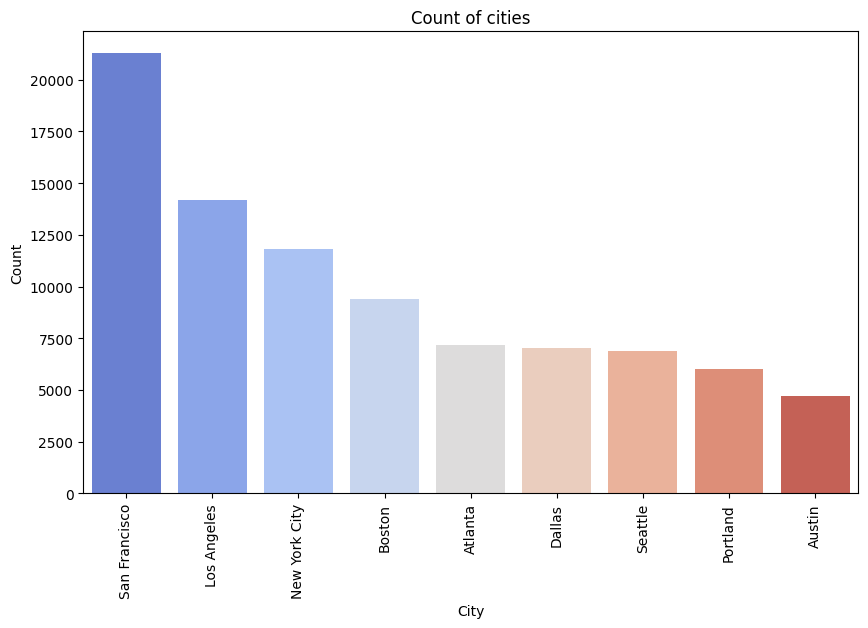

In [577]:
#plotting
plt.figure(figsize=(10,6))
sns.barplot(x='City',y='count', data = sorted_city_counts, palette='coolwarm')
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Count of cities')
plt.xticks(rotation=90)
plt.show()

**Key Insights**

The data reveals a distribution of sales across various cities, with San Francisco leading by a significant margin with 21,273 units sold, followed by Los Angeles and New York City with 14,182 and 11,805 units respectively. This indicates a strong market presence in major urban centers. Boston, Atlanta, and Dallas also show substantial sales figures, reflecting their considerable market shares. Seattle and Portland, while having fewer sales compared to the top three cities, still demonstrate significant engagement. Austin, with 4,712 units sold, rounds out the list, showing a smaller but still notable market presence. Overall, the data underscores a concentration of sales in large metropolitan areas, with the top cities driving the majority of the sales volume.

In [578]:
#states
state_counts = data_2019['State'].value_counts().reset_index()
sorted_state_counts = state_counts.sort_values(by='count', ascending=False)
sorted_state_counts

,State,count
0,California,35455
1,New York,11805
2,Texas,11760
3,Massachusetts,9389
4,Georgia,7167
5,Washington,6884
6,Oregon,4837
7,Maine,1181


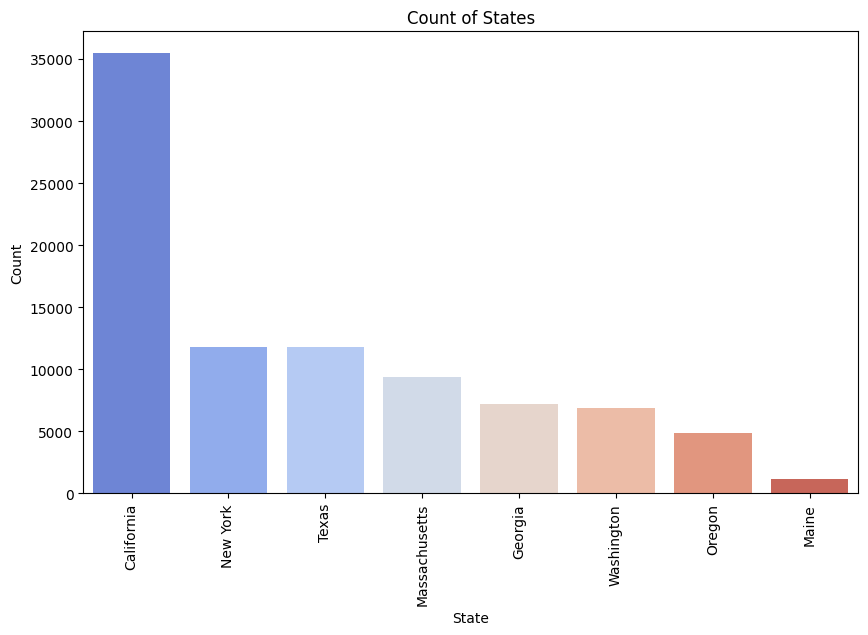

In [579]:
#plotting
plt.figure(figsize=(10,6))
sns.barplot(x='State',y='count', data = sorted_state_counts, palette='coolwarm')
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Count of States')
plt.xticks(rotation=90)
plt.show()

**Insights**

The data shows a distribution of sales by state, with California leading significantly at 35,455 units sold, indicating a strong market presence in the state. New York and Texas follow with 11,805 and 11,760 units respectively, reflecting substantial sales in these large states. Massachusetts, Georgia, and Washington also show notable sales figures, with 9,389, 7,167, and 6,884 units sold respectively. Oregon and Maine have much lower sales, with Oregon at 4,837 units and Maine at 1,181 units, suggesting more localized market engagement. Overall, the data highlights that the majority of sales are concentrated in states with larger populations and economic activity, particularly California, which stands out with a commanding lead.

#### **Bivariate Analysis**

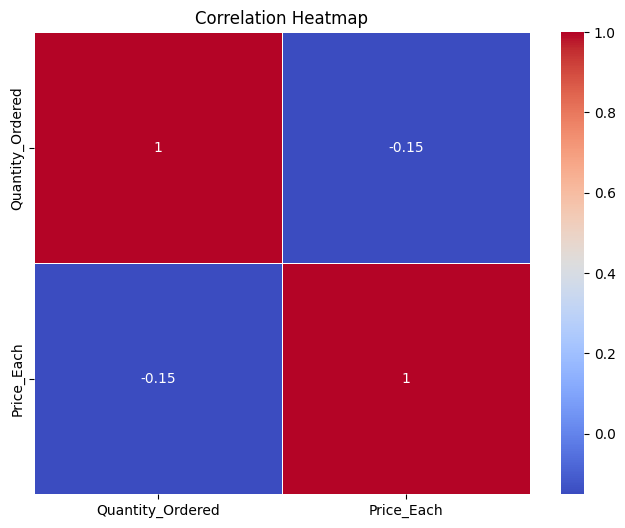

In [580]:
# Calculate the correlation matrix
correlation_matrix = data_2019[['Quantity_Ordered', 'Price_Each']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5, cbar=True)
plt.title('Correlation Heatmap')
plt.show()

**Insights**

In summary, a correlation of -0.15 suggests a very weak negative relationship between the variables. This means that while there is a slight tendency for one variable to decrease as the other increases, the relationship is not strong or significant.

In [582]:
data_2019.columns

Index(['Order_ID', 'Product', 'Quantity_Ordered', 'Price_Each', 'Order_Date',
       'Purchase_Address', 'City', 'State', 'Revenue'],
      dtype='object')

In [583]:
data_2019['Revenue'] = data_2019['Quantity_Ordered'] * data_2019['Price_Each']
revenue_per_product = data_2019.groupby(['Product'])['Revenue'].sum().reset_index()
sorted_revenue_per_product = revenue_per_product.sort_values(by='Revenue', ascending = False)
print(sorted_revenue_per_product.reset_index(drop=True))


                       Product       Revenue
0           Macbook Pro Laptop  3.811400e+06
1                       iPhone  2.331700e+06
2              ThinkPad Laptop  1.982980e+06
3                 Google Phone  1.617000e+06
4       34in Ultrawide Monitor  1.139210e+06
5       27in 4K Gaming Monitor  1.127071e+06
6     Apple Airpods Headphones  1.117350e+06
7                Flatscreen TV  6.699000e+05
8   Bose SoundSport Headphones  6.376362e+05
9             27in FHD Monitor  5.461136e+05
10             Vareebadd Phone  4.080000e+05
11                20in Monitor  2.106308e+05
12          LG Washing Machine  2.034000e+05
13                    LG Dryer  1.986000e+05
14    Lightning Charging Cable  1.653470e+05
15        USB-C Charging Cable  1.351903e+05
16            Wired Headphones  1.177058e+05
17       AA Batteries (4-pack)  5.072640e+04
18      AAA Batteries (4-pack)  4.394702e+04


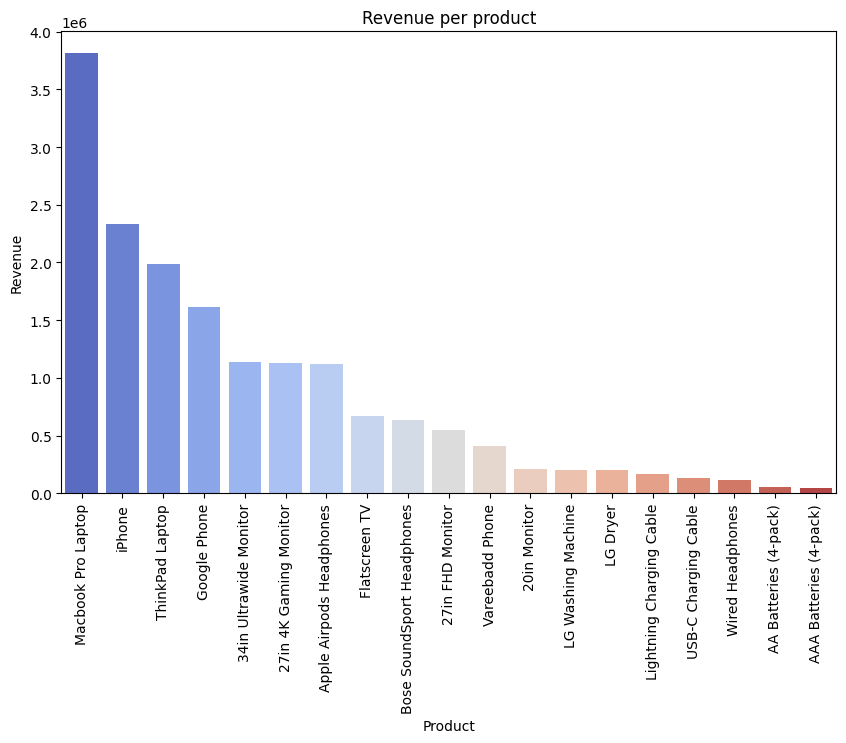

In [584]:
plt.figure(figsize=(10,6))
sns.barplot(x='Product', y='Revenue', data = sorted_revenue_per_product, palette='coolwarm')
plt.title('Revenue per product')
plt.xlabel('Product')
plt.ylabel('Revenue')
plt.xticks(rotation=90)
plt.show()

**Insights**

The revenue data highlights significant variations across products, with the Macbook Pro Laptop generating the highest revenue at approximately $3.81 million, followed by the iPhone at around $2.33 million. The ThinkPad Laptop and Google Phone also contribute substantial revenue, at roughly $1.98 million and $1.62 million, respectively. High-value items like the 34in Ultrawide Monitor and 27in 4K Gaming Monitor generate over $1 million each. In contrast, accessories and lower-cost items like the Lightning and USB-C Charging Cables, and Wired Headphones, contribute less to total revenue, reflecting their lower price points. The AA and AAA Batteries, being inexpensive consumables, generate the least revenue. Overall, the data indicates that high-ticket electronics drive the majority of revenue, while lower-cost items contribute less despite potentially higher sales volumes.

In [585]:
#revenue per city
revenue_per_city = data_2019.groupby(['City'])['Revenue'].sum().reset_index()
sorted_revenue_per_city = revenue_per_city.sort_values(by='Revenue',ascending=False)
print(sorted_revenue_per_city.reset_index(drop=True))

            City       Revenue
0  San Francisco  4.003463e+06
1    Los Angeles  2.652605e+06
2  New York City  2.216699e+06
3         Boston  1.709132e+06
4        Atlanta  1.357755e+06
5         Dallas  1.300725e+06
6        Seattle  1.286770e+06
7       Portland  1.123222e+06
8         Austin  8.635368e+05


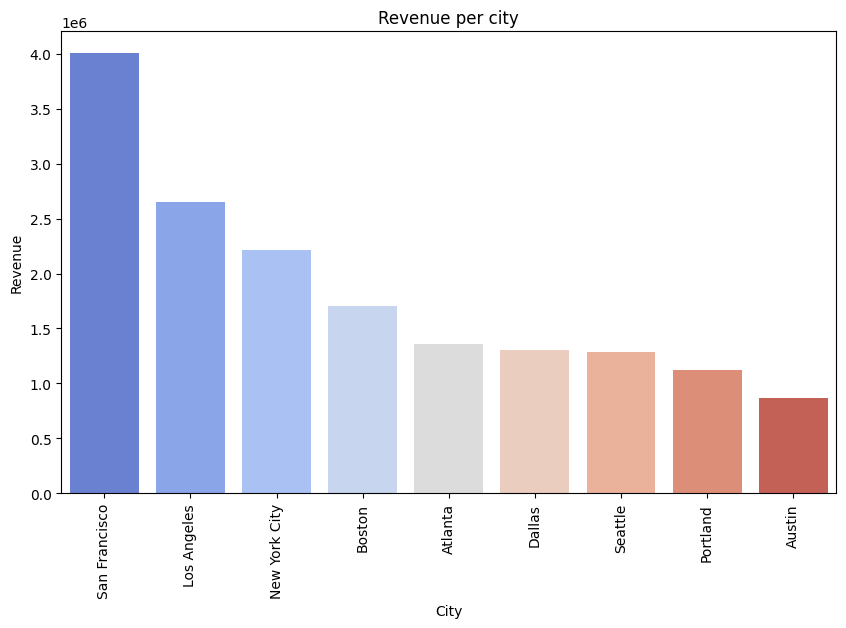

In [586]:
plt.figure(figsize=(10,6))
sns.barplot(x='City', y='Revenue', data = sorted_revenue_per_city, palette='coolwarm')
plt.title('Revenue per city')
plt.xlabel('City')
plt.ylabel('Revenue')
plt.xticks(rotation=90)
plt.show()

**Insights**

The revenue data reveals a strong correlation between city sales and total revenue. San Francisco leads by a considerable margin with approximately $4 million in revenue, indicating it is the top-performing city in terms of sales. Los Angeles and New York City follow with $2.65 million and $2.22 million respectively, highlighting their significant market impact. Boston, Atlanta, and Dallas also contribute notable revenues of $1.71 million, $1.36 million, and $1.30 million respectively. Seattle and Portland have lower but still substantial revenues, with $1.29 million and $1.12 million. Austin, with $863,536 in revenue, ranks lower but still shows a solid performance. Overall, the data underscores the dominance of major metropolitan areas in driving revenue, with San Francisco standing out as the highest contributor.


In [587]:
#revenue per state
revenue_per_state = data_2019.groupby(['State'])['Revenue'].sum().reset_index()
sorted_revenue_per_state = revenue_per_state.sort_values(by='Revenue',ascending=False)
print(sorted_revenue_per_state.reset_index(drop=True))

           State       Revenue
0     California  6.656068e+06
1       New York  2.216699e+06
2          Texas  2.164262e+06
3  Massachusetts  1.709132e+06
4        Georgia  1.357755e+06
5     Washington  1.286770e+06
6         Oregon  9.055915e+05
7          Maine  2.176309e+05


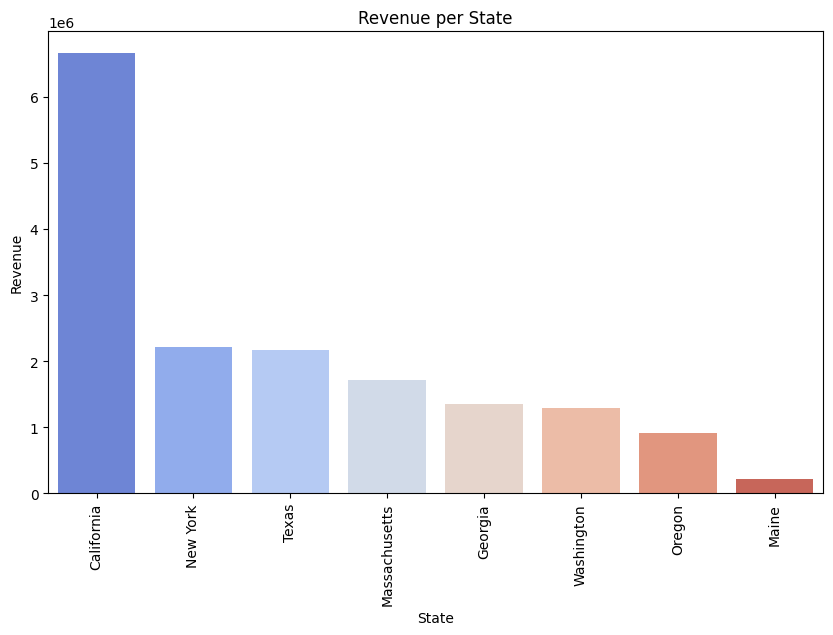

In [588]:
plt.figure(figsize=(10,6))
sns.barplot(x='State', y='Revenue', data = sorted_revenue_per_state, palette='coolwarm')
plt.title('Revenue per State')
plt.xlabel('State')
plt.ylabel('Revenue')
plt.xticks(rotation=90)
plt.show()

**Insights**

The revenue data by state highlights a significant concentration of sales in California, which generates approximately $6.66 million, making it the top revenue-producing state by a wide margin. New York and Texas follow with revenues of $2.22 million and $2.16 million respectively, indicating strong performance in these large states. Massachusetts, Georgia, and Washington also show substantial revenues, with $1.71 million, $1.36 million, and $1.29 million respectively. Oregon and Maine have considerably lower revenues, at about $905,591 and $217,630 respectively, reflecting their smaller market shares. Overall, the data underscores the dominance of California in revenue generation, with other states contributing significantly but at lower levels.

#### **Time-series Analysis**

**Quartely sales analysis**

In [590]:
data_2019.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88478 entries, 0 to 25082
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order_ID          88478 non-null  object        
 1   Product           88478 non-null  object        
 2   Quantity_Ordered  88478 non-null  float64       
 3   Price_Each        88478 non-null  float64       
 4   Order_Date        88478 non-null  datetime64[ns]
 5   Purchase_Address  88478 non-null  object        
 6   City              88478 non-null  object        
 7   State             88478 non-null  object        
 8   Revenue           88478 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 6.8+ MB


In [620]:
yearly_sales = data_2019[data_2019['Order_Date'].dt.year == 2019]
#quartely sales for the year
quarterly_sales = yearly_sales.resample('Q', on='Order_Date')['Revenue'].sum()
quarterly_sales = quarterly_sales.reset_index()
quarterly_sales = quarterly_sales.rename(columns={'Order_Date':'Quarter','Revenue':'Total Revenue'})
quarterly_sales['Quarter'] = quarterly_sales['Quarter'].dt.to_period('Q').dt.start_time
quarterly_sales['Quarter'] = quarterly_sales['Quarter'].dt.to_period('Q').apply(lambda x: f'Q{x.quarter}')
print(f"These are the revenues for each quarter: \n{quarterly_sales}")

These are the revenues for each quarter: 
  Quarter  Total Revenue
0      Q1   6.817794e+06
1      Q2   9.116114e+06
2      Q3   2.137081e+05
3      Q4   3.662918e+05


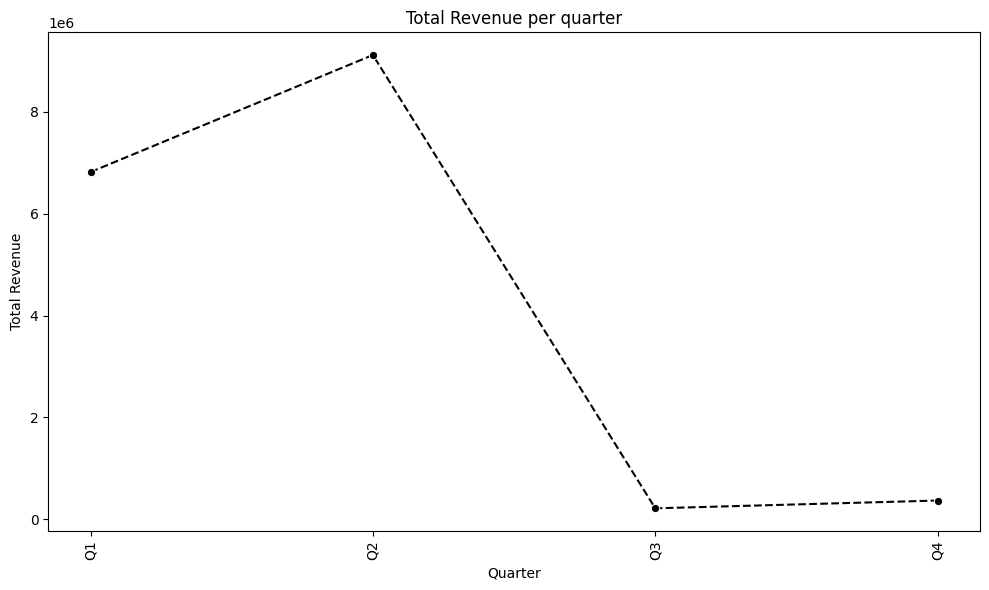

In [621]:
#plotting
plt.figure(figsize=(10,6))
sns.lineplot(x='Quarter',y='Total Revenue', data = quarterly_sales, marker ='o', linestyle ='--', color = 'black')
plt.title('Total Revenue per quarter')
plt.xlabel('Quarter')
plt.ylabel('Total Revenue')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Insights**

In 2019, the revenue data shows considerable variation across quarters, with the highest revenue of approximately $9.12 million recorded in Q2, indicating a peak period likely influenced by strong sales or seasonal factors. In contrast, Q3 saw a significant drop to around $213,708, suggesting a potential slump due to factors like reduced consumer spending or market conditions. Despite a slight recovery in Q4, with revenue increasing to about $366,292, it remained below the levels seen in Q1 and Q2. This trend highlights substantial fluctuations in revenue, pointing to a need for further investigation into the causes of these variations to stabilize and sustain growth throughout the year.

#### **Monthly Analysis**

In [614]:
monthly_sales = yearly_sales.resample('M', on = 'Order_Date')['Revenue'].sum()
monthly_sales = monthly_sales.reset_index()
monthly_sales.columns = ['Month', 'Revenue']
# Normalize to the start of the month
monthly_sales['Month'] = monthly_sales['Month'].dt.to_period('M').dt.to_timestamp()

print(f"The monthly Revenues are: \n{monthly_sales}")

The monthly Revenues are: 
        Month       Revenue
0  2019-01-01  1.812743e+06
1  2019-02-01  2.200078e+06
2  2019-03-01  2.804973e+06
3  2019-04-01  3.389218e+06
4  2019-05-01  3.150616e+06
5  2019-06-01  2.576280e+06
6  2019-07-01  7.676450e+04
7  2019-08-01  7.312110e+04
8  2019-09-01  6.382247e+04
9  2019-10-01  1.172346e+05
10 2019-11-01  1.113245e+05
11 2019-12-01  1.377327e+05


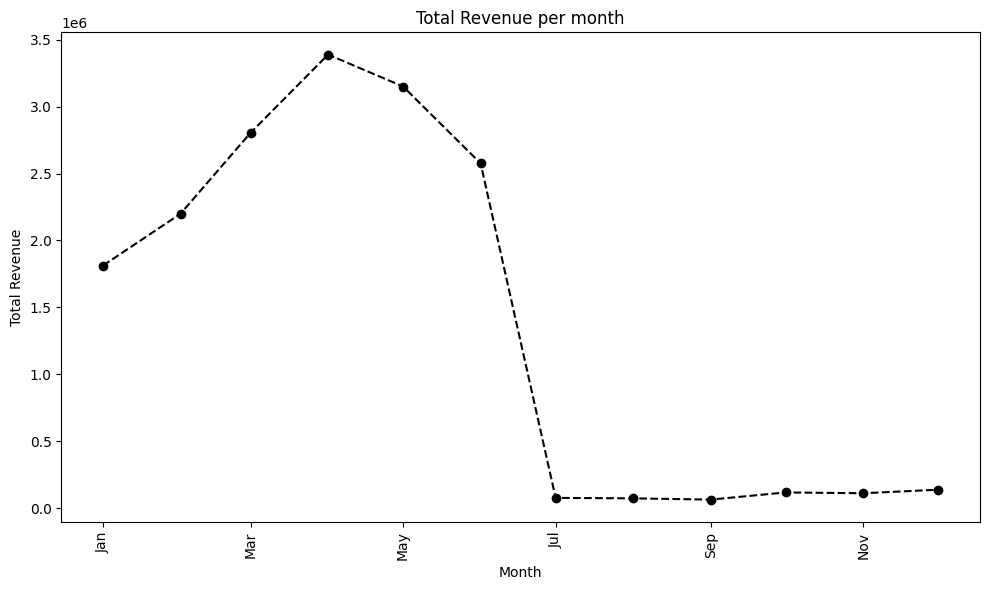

In [617]:
#plotiing
plt.figure(figsize=(10,6))
plt.plot(monthly_sales['Month'], monthly_sales['Revenue'],marker = 'o', linestyle = '--', color = 'black')
plt.title('Total Revenue per month')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Insights**

The monthly revenue data for 2019 reveals significant fluctuations throughout the year. There is a notable peak in revenue during April, with a substantial drop in July and August. The revenue starts relatively high in January and February but then experiences a decline through the summer months, only to rise again towards the end of the year. This seasonal pattern might suggest a period of higher sales in the first quarter, followed by a summer lull, and increased activity towards the end of the year. Understanding these trends could be crucial for forecasting and strategizing future sales efforts.

### **Answering Analytical Queations**

#### **1. How much money did we make in 2019?**

In [623]:
total_sales = data_2019['Revenue'].sum()
print(f"The total ammount of money made in 2019 is ${total_sales:,.2f}")

The total ammount of money made in 2019 is $16,513,908.56


#### **2. Can we identify any seasonality in the sales?**

To identify seasonality in sales, we'll analyze the sales data over time, specifically by quarters then by month. We'll plot the total sales  over the entire duration of the dataset and look for recurring patterns or trends.

- Group the sales data by month/quarter.
- Calculate the total sales for each month/quarter.
- Plot the total sales for each month/quarter.

In [624]:
yearly_sales = data_2019[data_2019['Order_Date'].dt.year == 2019]
#quartely sales for the year
quarterly_sales = yearly_sales.resample('Q', on='Order_Date')['Revenue'].sum()
quarterly_sales = quarterly_sales.reset_index()
quarterly_sales = quarterly_sales.rename(columns={'Order_Date':'Quarter','Revenue':'Total Revenue'})
quarterly_sales['Quarter'] = quarterly_sales['Quarter'].dt.to_period('Q').dt.start_time
quarterly_sales['Quarter'] = quarterly_sales['Quarter'].dt.to_period('Q').apply(lambda x: f'Q{x.quarter}')
print(f"These are the revenues for each quarter: \n{quarterly_sales}")

These are the revenues for each quarter: 
  Quarter  Total Revenue
0      Q1   6.817794e+06
1      Q2   9.116114e+06
2      Q3   2.137081e+05
3      Q4   3.662918e+05


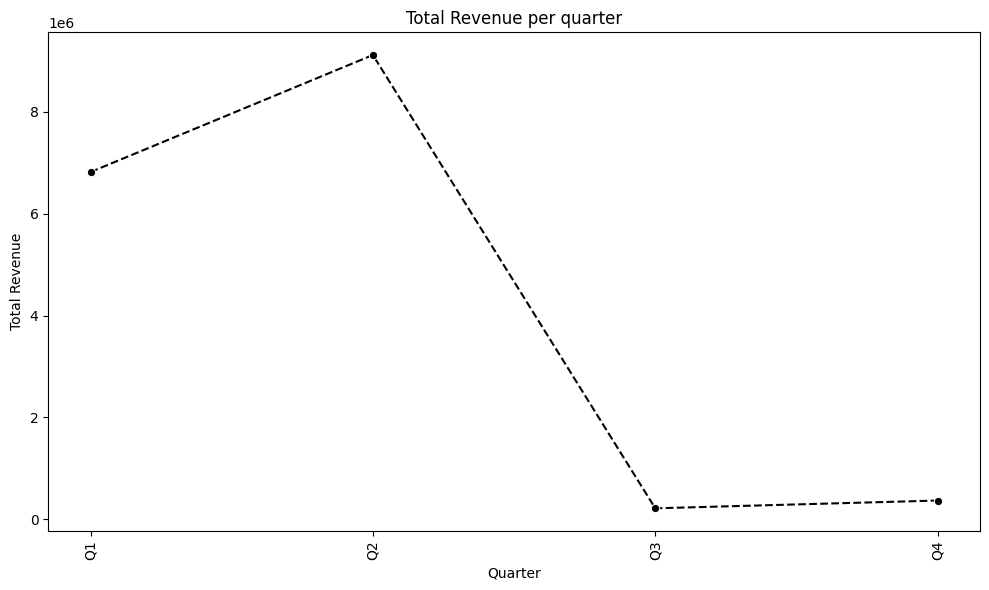

In [625]:
#plotting
plt.figure(figsize=(10,6))
sns.lineplot(x='Quarter',y='Total Revenue', data = quarterly_sales, marker ='o', linestyle ='--', color = 'black')
plt.title('Total Revenue per quarter')
plt.xlabel('Quarter')
plt.ylabel('Total Revenue')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### **Key Insights**

**Q1: Strong Start**

In the first quarter, sales reached approximately $6.82 million, reflecting a healthy start to the year. This could be due to post-holiday momentum or effective sales campaigns early in the year. The solid performance in Q1 provides a good foundation for the year ahead, and maintaining this momentum is key to ensuring sustained growth.

**Q2: Peak Performance**

The second quarter witnessed the highest sales, climbing to $9.12 million. This surge may be attributed to favorable market conditions, strong consumer demand, or well-executed business strategies. Understanding the specific drivers of this growth could help replicate this success in future periods.

**Q3: Significant Decline**

Sales dropped sharply in Q3, plummeting to $213,708. This drastic decline suggests a possible seasonal downturn, external disruptions, or misaligned strategies during these months. It is critical to analyze the factors behind this drop to avoid repeating this trend and to explore opportunities for boosting sales during typically slower periods.

**Q4: Modest Recovery**

The fourth quarter saw a modest recovery, with sales rebounding to $366,292. While an improvement over Q3, the sales in Q4 remain far below the peak of Q2. This partial recovery suggests that while some efforts to regain sales were effective, more targeted strategies are needed to fully restore growth.

**Recommendations**

- Analyze Q3 Trends: Investigate the underlying reasons for the significant drop in Q3, such as market conditions or internal business challenges, and develop counterstrategies to minimize such downturns in the future.

- Capitalize on Q2 Success: Study what worked in Q2 to drive peak sales and apply those insights to other quarters, especially during slower periods, to maximize overall performance throughout the year.

- Plan for Seasonal Fluctuations: Implement strategies such as targeted promotions, inventory adjustments, or product launches during slower quarters to balance out the fluctuations in sales and maintain more consistent revenue.

- Strengthen Q4 Sales Efforts: Since Q4 saw only a partial recovery, ramping up marketing and sales initiatives toward the end of the year could help boost sales to match Q2 levels, potentially leveraging holiday seasons or year-end campaigns.

#### **Monthly Analysis**

In [626]:
monthly_sales = yearly_sales.resample('M', on = 'Order_Date')['Revenue'].sum()
monthly_sales = monthly_sales.reset_index()
monthly_sales.columns = ['Month', 'Revenue']
# Normalize to the start of the month
monthly_sales['Month'] = monthly_sales['Month'].dt.to_period('M').dt.to_timestamp()

print(f"The monthly Revenues are: \n{monthly_sales}")

The monthly Revenues are: 
        Month       Revenue
0  2019-01-01  1.812743e+06
1  2019-02-01  2.200078e+06
2  2019-03-01  2.804973e+06
3  2019-04-01  3.389218e+06
4  2019-05-01  3.150616e+06
5  2019-06-01  2.576280e+06
6  2019-07-01  7.676450e+04
7  2019-08-01  7.312110e+04
8  2019-09-01  6.382247e+04
9  2019-10-01  1.172346e+05
10 2019-11-01  1.113245e+05
11 2019-12-01  1.377327e+05


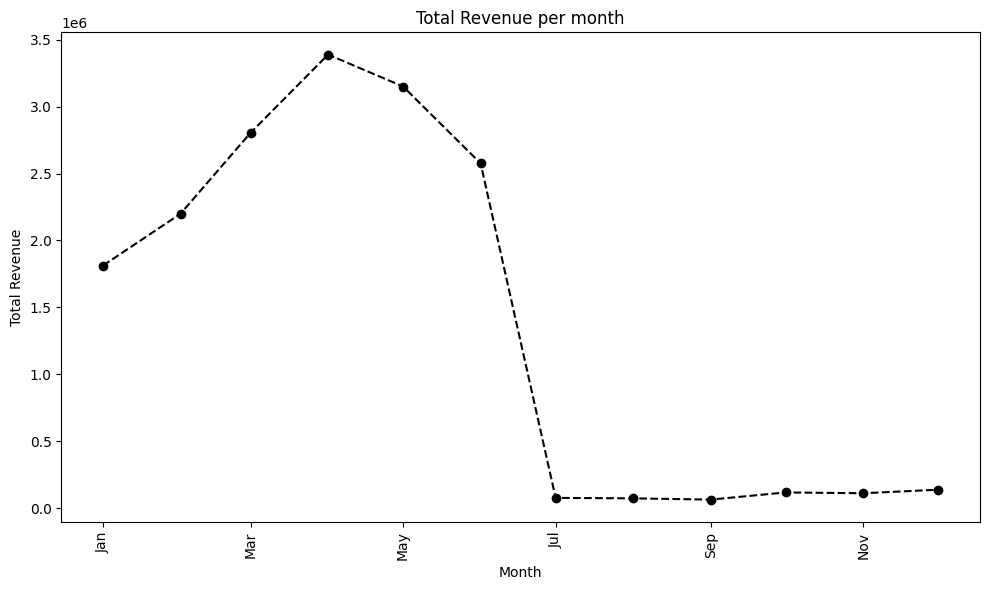

In [627]:
#plotiing
plt.figure(figsize=(10,6))
plt.plot(monthly_sales['Month'], monthly_sales['Revenue'],marker = 'o', linestyle = '--', color = 'black')
plt.title('Total Revenue per month')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### **Insights**
**1. Revenue Trends**
- January to June:
Revenue increased consistently from January (1.81 million) to April (3.39 million), marking the peak for the first half of the year.
May saw a slight decline (3.15 million), followed by a significant drop in June (2.58 million).
- July to December:
Starting in July, there was a dramatic drop in revenue to just over 76,000. This downward trend continued, with the lowest point being September (63,822).
From October to December, there was a slight recovery, though revenue remained significantly lower compared to the first half of the year, ending at 137,732 in December.

**2. Insights**

**Seasonal Performance:**

The first half of the year experienced strong sales, with consistent growth until April.
The second half, especially starting in July, saw a significant decline, which suggests a seasonal or operational issue. The sharp drop in revenue during July to September suggests possible external factors such as:
- Seasonal demand fluctuations.
- Stock or supply chain issues.
- Changes in market dynamics or competition.
Post-September Recovery:
Though revenue remained low, there was some improvement from October to December, which may indicate an end-of-year push, holiday-related sales, or promotional activities driving slight increases.

**3. Recommendations**
- Investigate Sales Drop:
Analyze the causes for the sharp decline in July-September. This could be related to seasonality, stock issues, or reduced consumer demand. Pinpointing the exact reason will help mitigate future declines.
- Optimize Marketing and Promotions:
Based on the recovery in the last quarter, targeted marketing or discounts may help boost revenue, particularly during traditionally low periods (July-September). Launching promotions or new campaigns early in Q3 could help stabilize the second-half sales.
- Diversify Product/Service Offerings:
If the drop is due to seasonality, consider diversifying your offerings to maintain more consistent revenue throughout the year. For example, promoting complementary products during slower months may help increase sales.
- Stock/Inventory Planning:
If inventory or supply chain disruptions were an issue, ensure that stocks are well-maintained and suppliers are reliable to prevent shortages during peak demand periods.
- Focus on Growth Periods:
January through April performed well. Capitalizing on this period with increased marketing efforts, customer engagement, or new product launches may maximize sales during this high-growth time.







#### **3. What are our best and worst-selling products?**

This can be answered in two ways
- Best and worst selling by revenue
- Best and worst selling by quantity

In [628]:
#Best and worst selling by quantity
#table to show counts
product_counts = data_2019['Product'].value_counts().reset_index()
#rename columns
product_counts.columns = ['Product', 'Count']
#sort in descending order
sorted_product_counts = product_counts.sort_values(by='Count', ascending=False)
print(sorted_product_counts)

                       Product  Count
0         USB-C Charging Cable  10332
1     Lightning Charging Cable  10288
2        AA Batteries (4-pack)   9803
3       AAA Batteries (4-pack)   9786
4             Wired Headphones   9000
5     Apple Airpods Headphones   7395
6   Bose SoundSport Headphones   6323
7             27in FHD Monitor   3623
8                       iPhone   3328
9       34in Ultrawide Monitor   2989
10      27in 4K Gaming Monitor   2884
11                Google Phone   2691
12          Macbook Pro Laptop   2238
13               Flatscreen TV   2226
14             ThinkPad Laptop   1982
15                20in Monitor   1901
16             Vareebadd Phone   1019
17          LG Washing Machine    339
18                    LG Dryer    331


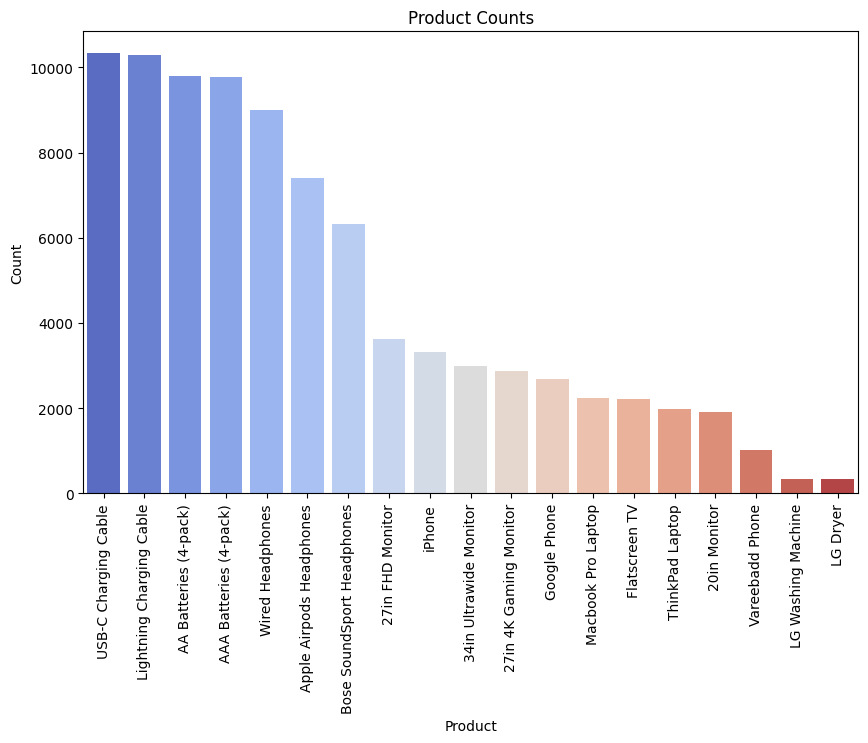

In [629]:
#bar chart in descending order
plt.figure(figsize=(10,6))
sns.barplot(x='Product', y = 'Count', data = sorted_product_counts, palette='coolwarm')
#labels
plt.xlabel('Product')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Product Counts')
plt.show()

In [632]:
best_selling_by_quantity = sorted_product_counts.head(5)
worst_selling_by_quantity = sorted_product_counts.tail(5)
print(f"The Best selling products by quantity are: \n{best_selling_by_quantity}")
print(f"The Worst selling products by quantity are: \n{worst_selling_by_quantity}")

The Best selling products by quantity are: 
                    Product  Count
0      USB-C Charging Cable  10332
1  Lightning Charging Cable  10288
2     AA Batteries (4-pack)   9803
3    AAA Batteries (4-pack)   9786
4          Wired Headphones   9000
The Worst selling products by quantity are: 
               Product  Count
14     ThinkPad Laptop   1982
15        20in Monitor   1901
16     Vareebadd Phone   1019
17  LG Washing Machine    339
18            LG Dryer    331


**Best-Selling Products**

These products likely have high demand due to their essential nature (charging cables, batteries) and wide use across various devices.

**Worst-Selling Products**

These products could be niche or have less frequent purchase cycles, or they might face strong competition in the market.

**Key Observations and Recommendations**

- Charging Cables and Batteries are clear top sellers, likely because they are affordable, widely needed, and tend to wear out or need replacing frequently.
- LG Washing Machine and Dryer have notably low sales, likely because large appliances are purchased infrequently and may face competition from other brands or retailers. Consider promoting these more aggressively or offering discounts to increase sales.
- Vareebadd Phone: The low sales might indicate it is not a popular or trusted brand. Improving customer reviews, increasing marketing efforts, or revising the product offering might help boost sales.

In [633]:
#best and worst selling by revenue
data_2019['Revenue'] = data_2019['Quantity_Ordered'] * data_2019['Price_Each']
revenue_per_product = data_2019.groupby(['Product'])['Revenue'].sum().reset_index()
sorted_revenue_per_product = revenue_per_product.sort_values(by='Revenue', ascending = False)
print(sorted_revenue_per_product.reset_index(drop=True))

                       Product       Revenue
0           Macbook Pro Laptop  3.811400e+06
1                       iPhone  2.331700e+06
2              ThinkPad Laptop  1.982980e+06
3                 Google Phone  1.617000e+06
4       34in Ultrawide Monitor  1.139210e+06
5       27in 4K Gaming Monitor  1.127071e+06
6     Apple Airpods Headphones  1.117350e+06
7                Flatscreen TV  6.699000e+05
8   Bose SoundSport Headphones  6.376362e+05
9             27in FHD Monitor  5.461136e+05
10             Vareebadd Phone  4.080000e+05
11                20in Monitor  2.106308e+05
12          LG Washing Machine  2.034000e+05
13                    LG Dryer  1.986000e+05
14    Lightning Charging Cable  1.653470e+05
15        USB-C Charging Cable  1.351903e+05
16            Wired Headphones  1.177058e+05
17       AA Batteries (4-pack)  5.072640e+04
18      AAA Batteries (4-pack)  4.394702e+04


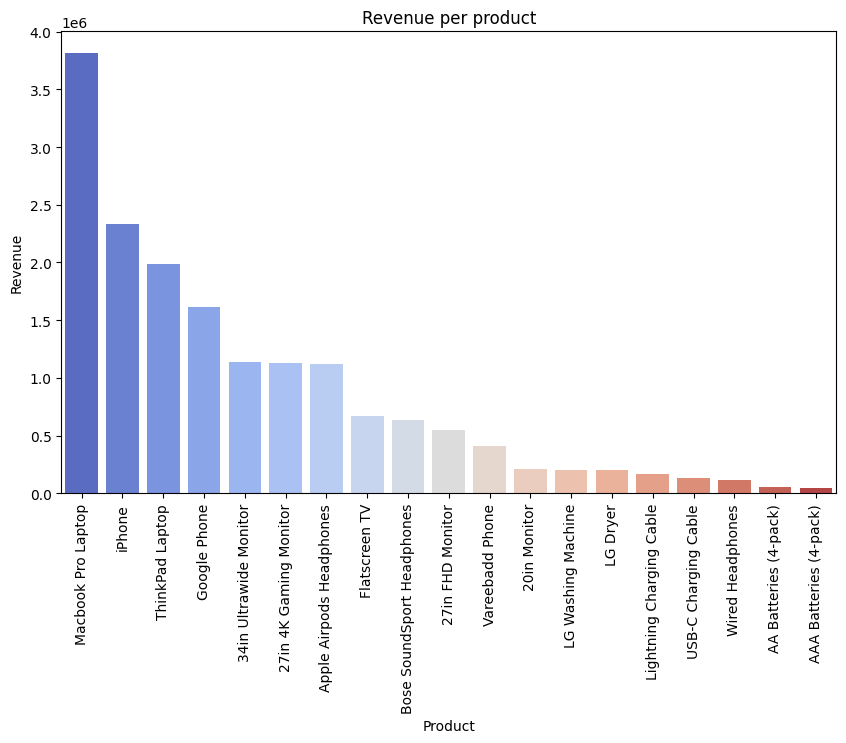

In [634]:
plt.figure(figsize=(10,6))
sns.barplot(x='Product', y='Revenue', data = sorted_revenue_per_product, palette='coolwarm')
plt.title('Revenue per product')
plt.xlabel('Product')
plt.ylabel('Revenue')
plt.xticks(rotation=90)
plt.show()

In [638]:
best_selling_by_revenue = sorted_revenue_per_product.head(5).reset_index()
worst_selling_by_revenue = sorted_revenue_per_product.tail(5).reset_index().sort_values(by='Revenue')

print(f"The best selling products by revenue are: \n{best_selling_by_revenue}")
print(f"The worst selling products by revenue are: \n{worst_selling_by_revenue}")

The best selling products by revenue are: 
   index                 Product       Revenue
0     13      Macbook Pro Laptop  3.811400e+06
1     18                  iPhone  2.331700e+06
2     14         ThinkPad Laptop  1.982980e+06
3      9            Google Phone  1.617000e+06
4      3  34in Ultrawide Monitor  1.139210e+06
The worst selling products by revenue are: 
   index                   Product        Revenue
4      5    AAA Batteries (4-pack)   43947.020006
3      4     AA Batteries (4-pack)   50726.399953
2     17          Wired Headphones  117705.829912
1     15      USB-C Charging Cable  135190.349917
0     12  Lightning Charging Cable  165346.999920


#### **Insights**

- **High Revenue Products:**

Products like MacBook Pro, iPhone, and ThinkPad Laptop are high-priced items, and even though their sales volumes may not be as high as smaller products (e.g., charging cables), they drive significant revenue. Focusing on promoting these products could further boost revenue.

- **Low Revenue Products:**

Items like batteries and charging cables sell in large volumes but contribute minimally to revenue due to their low price points. This shows that while they are essential products, they aren’t major revenue drivers. However, they are likely important for customer retention and regular purchase behavior.

- **Mid-Range Performers:**
Products like the 34in Ultrawide Monitor, 27in 4K Gaming Monitor, and Apple AirPods are relatively expensive and generate solid revenue, indicating demand for higher-quality monitors and headphones.

#### **Recommendations**

- **Upsell & Cross-Sell High-Revenue Products:**

Promote high-revenue items like laptops and phones through bundles or special offers. For example, offering accessories like charging cables or headphones at a discount when purchasing a laptop or phone could increase overall sales.

- **Discount/Bundle Low-Cost, High-Volume Products:**

For products like batteries, charging cables, and headphones, offering them in bundles (e.g., multi-packs or combo deals) might boost revenue by encouraging larger purchases.

- **Expand Premium Product Line:**

Since high-end products like laptops, phones, and monitors are generating the most revenue, consider introducing more premium models or expanding the product line to capture this profitable market.

- **Strategic Promotions for Low-Performing Products:**

Vareebadd Phone, LG Dryer, and Washing Machine have low sales and revenue. To boost performance, consider offering discounts, running marketing campaigns, or improving product reviews and visibility to attract more customers.

- **Leverage High-Volume Items for Brand Loyalty:**

Even though items like charging cables and batteries don’t generate high revenue, they are essential purchases that keep customers returning. Leverage this by offering loyalty programs or incentives for frequent buyers, which may also lead to higher-value purchases over time.

#### **4. How do sales compare to previous months or weeks**

In [648]:
weekly_sales = data_2019.resample('W', on = 'Order_Date')['Revenue'].sum().reset_index()
weekly_sales.columns = ['Week','Revenue']
weekly_sales['Revenue_Change(%)'] = weekly_sales['Revenue'].pct_change() * 100
weekly_sales.head()

,Week,Revenue,Revenue_Change(%)
0,2019-01-06,344678.73,NaN
1,2019-01-13,409389.43,18.774208
2,2019-01-20,394921.11,-3.534122
3,2019-01-27,426020.17,7.874753
4,2019-02-03,459570.62,7.875320


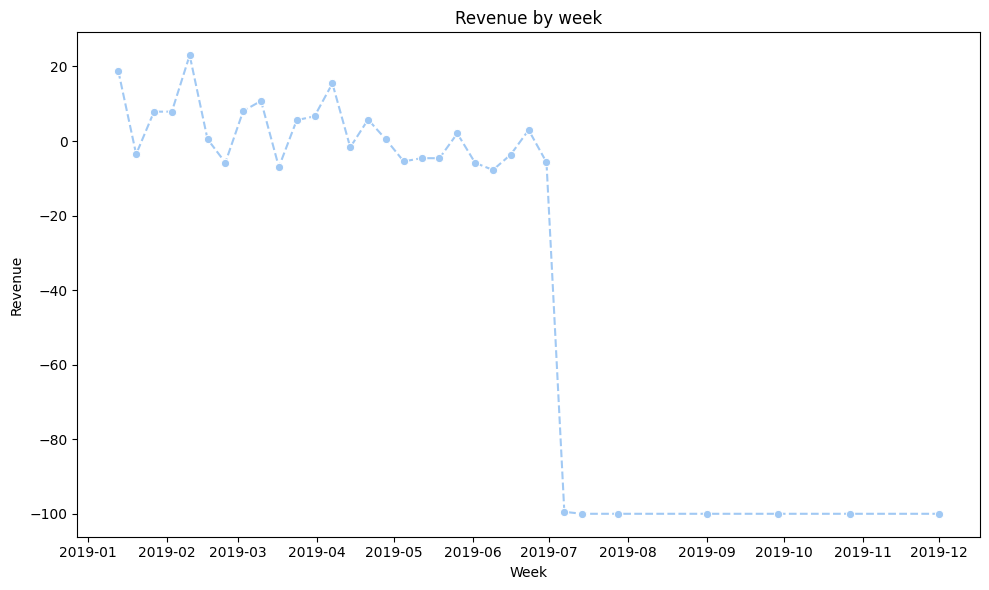

In [645]:
plt.figure(figsize=(10,6))
sns.lineplot(x='Week',y='Revenue_Change(%)',data=weekly_sales, linestyle='--', marker='o')
plt.xlabel('Week')
plt.ylabel('Revenue')
plt.title('Revenue by week')
plt.tight_layout()
plt.show()

In [652]:
monthly_sales['Revenue_Change(%)'] = monthly_sales['Revenue'].pct_change()*100
monthly_sales

,Month,Revenue,Revenue_Change(%)
0,2019-01-01,1.812743e+06,NaN
1,2019-02-01,2.200078e+06,21.367355
2,2019-03-01,2.804973e+06,27.494264
3,2019-04-01,3.389218e+06,20.828883
4,2019-05-01,3.150616e+06,-7.040024
5,2019-06-01,2.576280e+06,-18.229325
6,2019-07-01,7.676450e+04,-97.020336
7,2019-08-01,7.312110e+04,-4.746204
8,2019-09-01,6.382247e+04,-12.716753
9,2019-10-01,1.172346e+05,83.688629


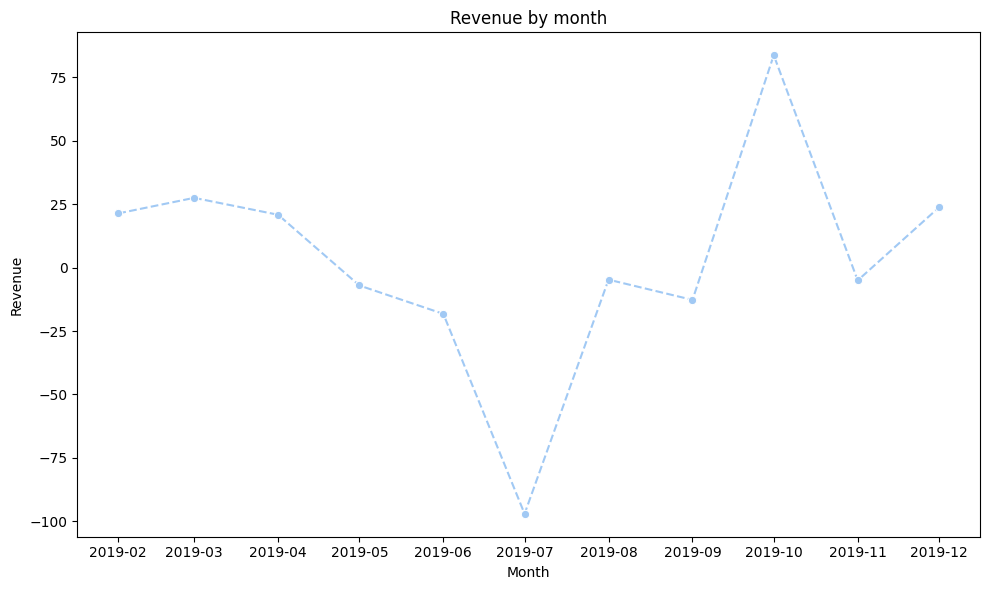

In [651]:
plt.figure(figsize=(10,6))
sns.lineplot(x='Month',y='Revenue_Change(%)',data=monthly_sales, linestyle='--', marker='o')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Revenue by month')
plt.tight_layout()
plt.show()

#### **Insights**

##### **Monthly Revenue Changes**

**Significant Increases:**

- January to February: Revenue grows by 21.37%.
- February to March: Revenue increases by 27.49%.
- March to April: Revenue grows by 20.83%.

**Decrease:**

- April to May: Revenue decreases by 7.04%.
- May to June: Revenue drops by 18.23%.
- June to July: A drastic decline of 97.02% is observed, indicating a major issue or a possible data anomaly.

**Recovery and Stability:**

- July to October: Revenue shows a partial recovery with a 83.69% increase in October, but remains lower than earlier months.
- November and December: Slight decline in November, followed by a 23.72% increase in December.

**Key Observations**

- Revenue Peaks and Drops
Peak Period: April is the peak month with the highest revenue, suggesting potential successful campaigns or seasonal factors.
- Severe Drop: July experiences an extreme drop in revenue, which could be due to operational disruptions, system issues, or a shift in market conditions.

- Recovery Phase
October Recovery: Significant recovery in October suggests a rebound from earlier issues, but revenue still does not reach earlier peak levels.

#### **Recommendations**

- Investigate Revenue Drop in July

Root Cause Analysis: Examine potential causes for the drastic revenue drop in July. This could include supply chain issues, system outages, or significant changes in market conditions.
Mitigation: Develop contingency plans to address identified issues to prevent similar drops in the future.

- Capitalize on High Revenue Periods

Analyze Success Factors: Investigate the factors leading to high revenue periods in early 2019, especially in April. Replicate successful strategies and apply them to other periods.

- Seasonal Promotions: Plan marketing or promotional activities around peak months to maximize revenue.

- Focus on Stabilizing Revenue

Monthly Monitoring: Implement regular monitoring to ensure stability and quickly identify and address any signs of revenue decline.

- Address Recovery and Sustained Growth

Review Recovery Strategies: Analyze the effectiveness of recovery strategies implemented in October and December to understand what contributed to the increase.
Sustain Growth: Develop strategies to sustain revenue growth by focusing on customer retention, market expansion, and improving operational efficiency.


#### **5. Which cities are our products delivered to most?**

In [657]:
#products per city
product_count_per_city = data_2019['City'].value_counts().reset_index()
product_count_per_city

,City,count
0,San Francisco,21273
1,Los Angeles,14182
2,New York City,11805
3,Boston,9389
4,Atlanta,7167
5,Dallas,7048
6,Seattle,6884
7,Portland,6018
8,Austin,4712


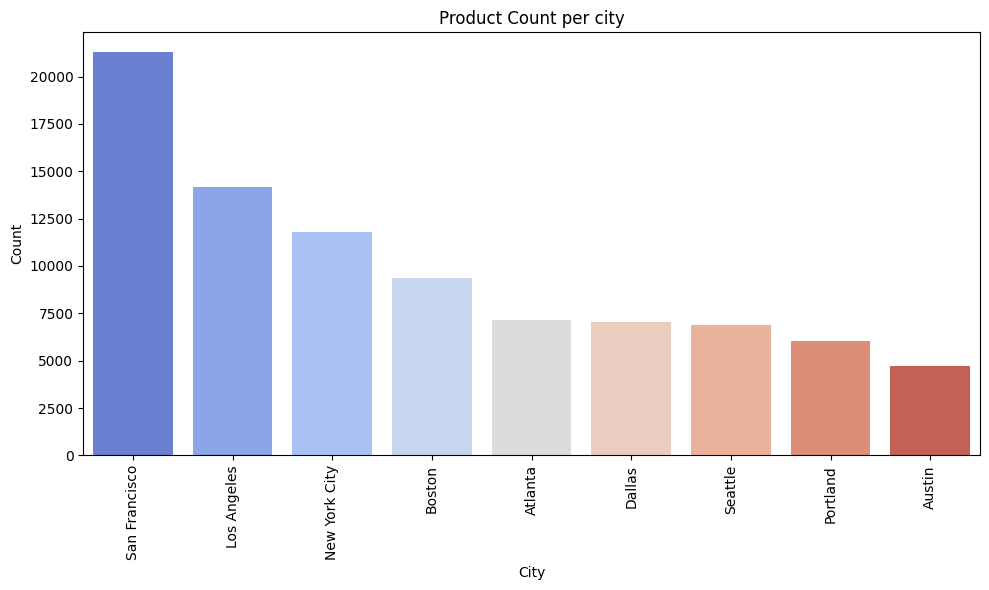

In [659]:
plt.figure(figsize=(10,6))
sns.barplot(x='City', y='count', data=product_count_per_city, palette='coolwarm')
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Product Count per city')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Top Cities by Product Count**

San Francisco: 21,273 units (highest)
Los Angeles: 14,182 units
New York City: 11,805 units

**Cities with Lower Product Counts**

Austin: 4,712 units (lowest)
Portland: 6,018 units
Seattle: 6,884 units

**Insights**

- High Product Count Cities: San Francisco, Los Angeles, and New York City have the highest counts, indicating strong market demand.
- Lower Product Count Cities: Austin has the lowest count, suggesting potential opportunities for growth.

**Recommendations**

- Maximize Sales in High-Count Cities: Focus marketing and inventory efforts in cities with higher product counts.
- Explore Opportunities in Low-Count Cities: Investigate and address reasons for lower counts in cities like Austin to boost market presence.
- Balance Distribution: Ensure even product distribution while focusing on cities with higher demand.

#### **6. How do product categories compare in revenue generated and quantities ordered?**

In [660]:
data_2019['Product'].unique()

array(['iPhone', 'Lightning Charging Cable', 'Wired Headphones',
       '27in FHD Monitor', 'AAA Batteries (4-pack)',
       '27in 4K Gaming Monitor', 'USB-C Charging Cable',
       'Bose SoundSport Headphones', 'Apple Airpods Headphones',
       'Macbook Pro Laptop', 'Flatscreen TV', 'Vareebadd Phone',
       'AA Batteries (4-pack)', 'Google Phone', '20in Monitor',
       '34in Ultrawide Monitor', 'ThinkPad Laptop', 'LG Dryer',
       'LG Washing Machine'], dtype=object)

In [661]:
# Define product categories
product_categories = {
    'iPhone': 'Smartphones',
    'Google Phone': 'Smartphones',
    'Vareebadd Phone': 'Smartphones',
    'Lightning Charging Cable': 'Accessories',
    'USB-C Charging Cable': 'Accessories',
    'Wired Headphones': 'Accessories',
    'Apple Airpods Headphones': 'Accessories',
    'Bose SoundSport Headphones': 'Accessories',
    'Macbook Pro Laptop': 'Laptops and Computers',
    'ThinkPad Laptop': 'Laptops and Computers',
    '27in 4K Gaming Monitor': 'Laptops and Computers',
    '27in FHD Monitor': 'Laptops and Computers',
    '34in Ultrawide Monitor': 'Laptops and Computers',
    '20in Monitor': 'Laptops and Computers',
    'LG Washing Machine': 'Home Appliances',
    'LG Dryer': 'Home Appliances',
    'Flatscreen TV': 'Home Appliances',
    'AAA Batteries (4-pack)': 'Batteries',
    'AA Batteries (4-pack)': 'Batteries',
}

data_2019['Product_Category'] = data_2019['Product'].map(product_categories)




,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,City,State,Revenue,Product_Category
0,141234,iPhone,1.0,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",Boston,Massachusetts,700.00,Smartphones
1,141235,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",Portland,Oregon,14.95,Accessories
2,141236,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",San Francisco,California,23.98,Accessories
3,141237,27in FHD Monitor,1.0,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",Los Angeles,California,149.99,Laptops and Computers
4,141238,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",Austin,Texas,11.99,Accessories


##### **Revenue generated**

In [667]:
revenue_generated_per_category = data_2019.groupby(['Product_Category'])['Revenue'].sum().reset_index()
sorted_revenue_generated_per_category = revenue_generated_per_category.sort_values(by='Revenue', ascending=False).reset_index(drop=True)
sorted_revenue_generated_per_category

,Product_Category,Revenue
0,Laptops and Computers,8.817406e+06
1,Smartphones,4.356700e+06
2,Accessories,2.173229e+06
3,Home Appliances,1.071900e+06
4,Batteries,9.467342e+04


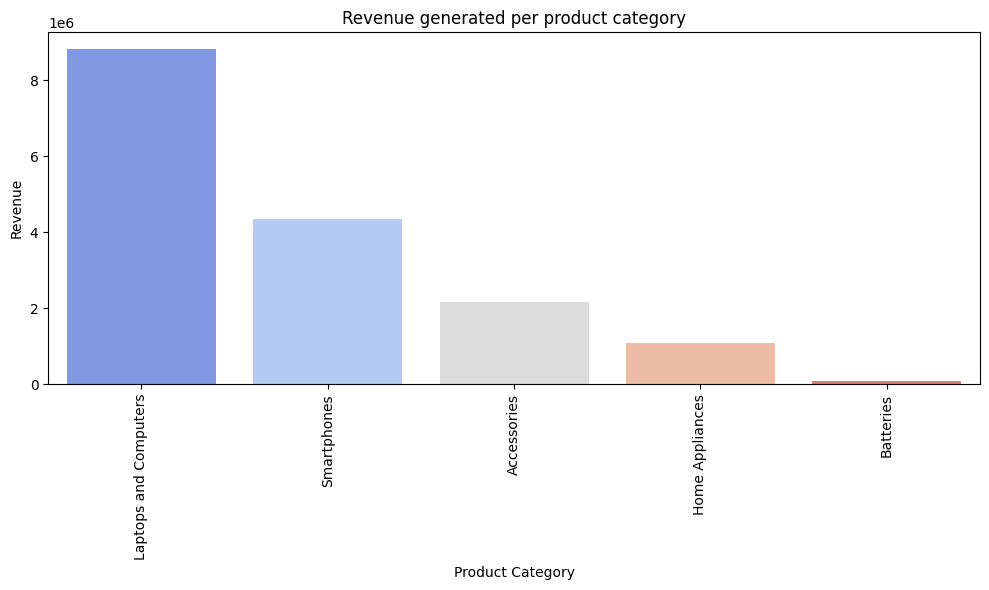

In [668]:
#plotting the data
plt.figure(figsize=(10,6))
sns.barplot(x='Product_Category', y= 'Revenue', data = sorted_revenue_generated_per_category, palette='coolwarm')
plt.xlabel('Product Category')
plt.ylabel('Revenue')
plt.title('Revenue generated per product category')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Revenue Distribution by Category**

- Laptops and Computers: $8,817,406
This category generates the highest revenue, indicating strong sales performance. It suggests that products like laptops and monitors are significant revenue drivers.

- Smartphones: $4,356,700
Smartphones also contribute significantly to revenue. This category is important but generates less revenue compared to Laptops and Computers.

- Accessories: $2,173,229
Accessories bring in a substantial amount of revenue, but less than Smartphones. This category includes items such as charging cables and headphones.

- Home Appliances: $1,071,900
Home appliances contribute a notable portion of revenue. This category includes larger household items, which might have higher unit prices.

- Batteries: $94,673
Batteries contribute the least in terms of revenue. Despite being essential, this category has the lowest revenue, likely due to lower unit prices and/or lower sales volume.

**2. Key Takeaways**
- High Revenue Generators: 
The categories "Laptops and Computers" and "Smartphones" are the top performers, contributing the most to overall revenue. Investing in these areas or expanding the product range could be beneficial.

- Growth Opportunities: 
The "Accessories" and "Home Appliances" categories, while contributing a good amount, have potential for growth. Promotional activities or bundling these products with higher-revenue items might boost their performance.

- Low Performer: The "Batteries" category, with its lower revenue, might need strategic attention. This could involve increasing product visibility, bundling with other products, or exploring new sales channels.

**3. Recommendations**

- Expand Product Range: 
In categories with high revenue like "Laptops and Computers" and "Smartphones," consider expanding the product range or offering complementary items.

- Promotional Strategies: 
For "Accessories" and "Home Appliances," implement promotional strategies or cross-sell with higher revenue items to increase sales.

- Review Battery Sales: 
Investigate the factors contributing to the lower revenue in the "Batteries" category. Consider optimizing pricing, enhancing product features, or increasing marketing efforts.

##### **By quantity**

In [671]:
data_2019.columns

Index(['Order_ID', 'Product', 'Quantity_Ordered', 'Price_Each', 'Order_Date',
       'Purchase_Address', 'City', 'State', 'Revenue', 'Product_Category'],
      dtype='object')

In [676]:
product_category_by_quantity = data_2019.groupby(['Product_Category'])['Quantity_Ordered'].sum().reset_index()
sorted_product_category_by_quantity = product_category_by_quantity.sort_values(by='Quantity_Ordered', ascending= False).reset_index(drop=True)
sorted_product_category_by_quantity

,Product_Category,Quantity_Ordered
0,Accessories,46016.0
1,Batteries,27908.0
2,Laptops and Computers,15669.0
3,Smartphones,7046.0
4,Home Appliances,2903.0


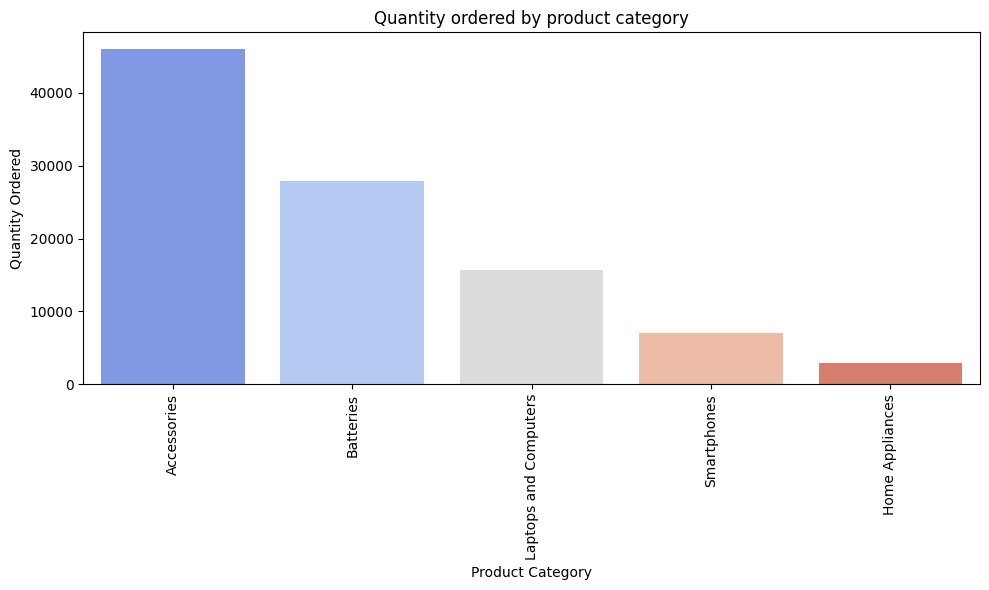

In [677]:
plt.figure(figsize=(10,6))
sns.barplot(x='Product_Category', y='Quantity_Ordered', data=sorted_product_category_by_quantity,palette='coolwarm')
plt.xlabel('Product Category')
plt.ylabel('Quantity Ordered')
plt.title('Quantity ordered by product category')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [679]:
#grouping by both
#combining the two dataframes
category_summary = pd.merge(sorted_product_category_by_quantity,sorted_revenue_generated_per_category, on='Product_Category')
category_summary['Revenue_per_unit'] = category_summary['Revenue']/category_summary['Quantity_Ordered']
category_summary

,Product_Category,Quantity_Ordered,Revenue,Revenue_per_unit
0,Accessories,46016.0,2.173229e+06,47.227691
1,Batteries,27908.0,9.467342e+04,3.392340
2,Laptops and Computers,15669.0,8.817406e+06,562.729321
3,Smartphones,7046.0,4.356700e+06,618.322452
4,Home Appliances,2903.0,1.071900e+06,369.238719


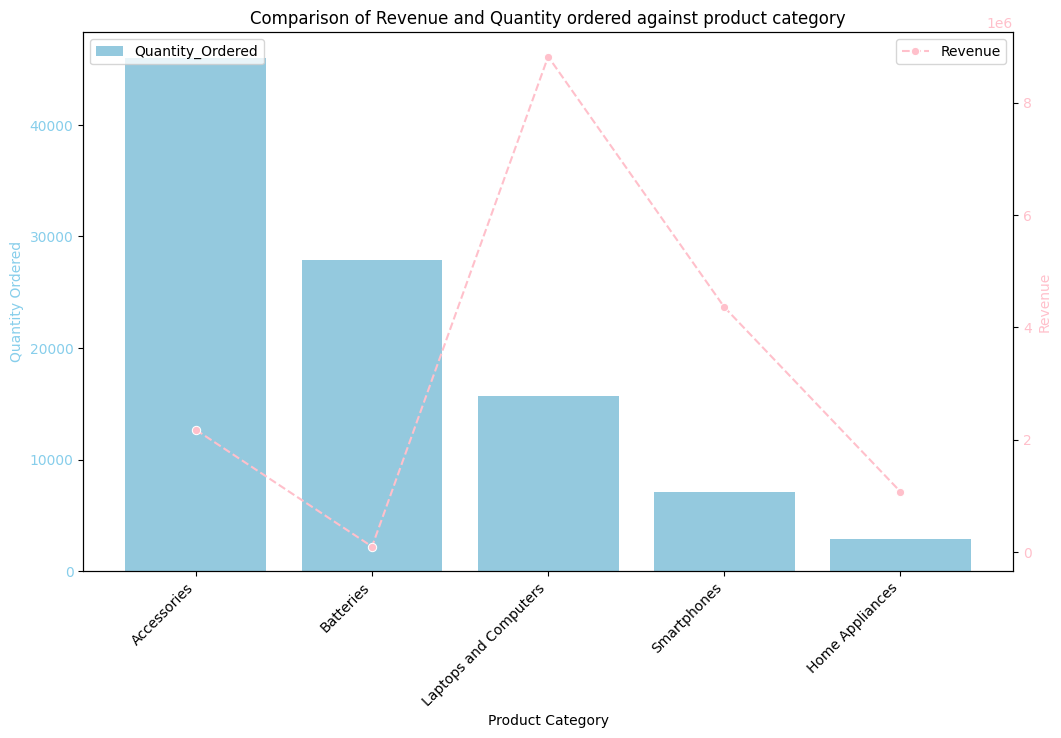

In [680]:
#visualising
fig,ax1= plt.subplots(figsize=(12,7))
#bar plot for quantity ordered
sns.barplot(data=category_summary, x='Product_Category', y='Quantity_Ordered', ax=ax1, color='skyblue', label = 'Quantity_Ordered')
#secondary axis
ax2 = ax1.twinx()
sns.lineplot(data=category_summary, x='Product_Category', y='Revenue', ax=ax2,color='pink', marker='o', linestyle='--', label='Revenue')
#customize
ax1.set_xlabel('Product Category')
ax1.set_ylabel('Quantity Ordered', color='skyblue')
ax2.set_ylabel('Revenue', color='pink')
plt.title('Comparison of Revenue and Quantity ordered against product category')
ax1.tick_params(axis ='y', labelcolor = 'skyblue')
ax2.tick_params(axis ='y', labelcolor = 'pink')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation =45, ha ='right')
ax1.legend(loc= 'upper left')
ax2.legend(loc= 'upper right')

##### **Insights**
**1. High Quantity Ordered, Low Revenue Per Unit**

**Products: Accessories, Batteries**

- **Accessories:**

Quantity Ordered: 46,016 units
Revenue: $2,173,229
Revenue per Unit: $47.23

**Analysis:** 

Accessories have a very high sales volume, meaning that many units are sold. However, the revenue per unit is relatively low, indicating that each unit contributes a modest amount to the total revenue. This often suggests that accessories are priced lower compared to other products. Despite the high quantity sold, the overall revenue is limited by the low price point. This could mean that accessories are either essential but inexpensive items, or they are sold in bulk but at a lower margin.

- **Batteries:**

Quantity Ordered: 27,908 units
Revenue: $94,673
Revenue per Unit: $3.39

**Analysis:** 

Batteries also have a high quantity ordered but generate very low revenue per unit. This suggests that batteries are a low-cost item with minimal margins. Despite selling a large number of units, the total revenue remains low due to the low price per unit.
Implications:

- **Low Margins:** 

Both categories have low margins per unit, which can impact profitability. Selling high volumes of low-margin items may require large sales efforts and efficient operations to be profitable.
Strategy Considerations: To improve profitability, the focus could be on increasing the unit price or finding ways to reduce costs. Alternatively, boosting sales volumes further could help to compensate for the low margins, but this might not always be feasible.

**2. High Revenue Per Unit, Lower Quantity Ordered**

**Products: Laptops and Computers, Smartphones**

- **Laptops and Computers:**

Quantity Ordered: 15,669 units
Revenue: $8,817,406
Revenue per Unit: $562.73

**Analysis:** 

Laptops and Computers have a lower quantity ordered compared to Accessories and Batteries but achieve very high revenue per unit. This suggests that each sale contributes significantly to the total revenue due to the high price of these items. High-margin products typically include significant features or advanced technology that justifies their higher price. Despite selling fewer units, the revenue from these sales is substantial.

- **Smartphones:**

Quantity Ordered: 7,046 units
Revenue: $4,356,700
Revenue per Unit: $618.32

**Analysis:** 

Smartphones also exhibit high revenue per unit, with each unit sold contributing a significant amount to the total revenue. The relatively high price per unit leads to high revenue even with fewer units sold.
Implications:

- **High Margins:** 

These products have high margins, which means that each sale is very profitable. High revenue per unit usually indicates that the products are premium or high-tech items with strong market demand.
Strategy Considerations: For high-margin products, the strategy could focus on optimizing pricing and maintaining high product quality. Marketing efforts should emphasize the value and benefits of the product to justify the higher price.

**3. Balanced Approach**
- **Product: Home Appliances**

Quantity Ordered: 2,903 units
Revenue: $1,071,900
Revenue per Unit: $369.24

- **Analysis:** 

Home Appliances have a moderate quantity ordered and a relatively high revenue per unit. This indicates that while the volume of sales is not as high as Accessories or Batteries, the revenue generated per sale is significant. This balance suggests that Home Appliances are priced reasonably high but are also sold in adequate quantities to generate substantial revenue.

**Implications:**

Balanced Margins: Home Appliances provide a middle ground between high-volume, low-margin items and low-volume, high-margin items. They offer good revenue potential without the extremes of the other categories.

- **Strategy Considerations:** 

For balanced products, focusing on maintaining a steady sales volume and optimizing profit margins is crucial. Marketing and operational strategies should aim to sustain a good balance between sales volume and revenue per unit.

